## Import dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df_all = pd.read_csv('DCD_April.csv')

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_all.columns = [col.lower().replace(' ','_') for col in df_all.columns.tolist()]
df_all.columns = [col.lower().replace('/timestamp','') for col in df_all.columns.tolist()]

In [5]:
date_col = [col for col in df_all.columns.tolist() if 'date' in col]
df_all[date_col] = df_all[date_col].apply(pd.to_datetime,format = "%m/%d/%Y %H:%M:%S")

In [61]:
df_all.head(n=2)

,unique_row_id,cvo_sid,event_site_id,touchpoint_site_id,event_site_name,touchpoint_site_name,event_type,event_id,event_date,touchpoint_date,...,conversion,touchpoint_type,first_touch_date,last_touch_date,source_1,source_2,source_3,touchpoints_in_path,attribution_sequence,path_position
0,5W9DNMBQDD9D_1491602098.559270_1955401_-256266...,5W9DNMBQDD9D,78,78,Nexium24hour,Nexium24hour,nexium24hour-buy.now,1000003139,2017-04-07 17:54:58,2017-04-07 17:54:58,...,1.000000,visit,2017-04-07 17:54:58,2017-04-07 17:54:58,ppc nonbrand,google,+cure +heartburn,1,1,only
1,7XPU6KNGJ5SQ_1492811571.793190_1765394_1765394_0,7XPU6KNGJ5SQ,762,762,Centrum,Centrum,centrum-coupon.submit,100000665,2017-04-21 17:52:51,2017-04-21 17:52:51,...,0.988062,NaN,2017-04-12 12:26:32,2017-04-21 17:52:51,base,n/a,n/a,2,0,n/a


## Feature Engineering

In [6]:
df_base_remove=df_all[df_all['source_1']!='base']

In [7]:
df_base_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027602 entries, 0 to 1253318
Data columns (total 22 columns):
unique_row_id           1027602 non-null object
cvo_sid                 1027602 non-null object
event_site_id           1027602 non-null int64
touchpoint_site_id      1027602 non-null int64
event_site_name         1027602 non-null object
touchpoint_site_name    1027602 non-null object
event_type              1027602 non-null object
event_id                1027602 non-null object
event_date              1027602 non-null datetime64[ns]
touchpoint_date         1027602 non-null datetime64[ns]
total_event_value       1027602 non-null float64
touchpoint_revenue      1027602 non-null float64
conversion              1027602 non-null float64
touchpoint_type         1027602 non-null object
first_touch_date        1027602 non-null datetime64[ns]
last_touch_date         1027602 non-null datetime64[ns]
source_1                1027602 non-null object
source_2                1027602 non-nu

In [62]:
selected_col=['event_site_name','touchpoint_site_name','event_type','conversion','touchpoint_type','source_1','source_2','touchpoints_in_path','attribution_sequence','path_position']

In [63]:
selected_col.extend(date_col)

In [64]:
selected_col

['event_site_name',
 'touchpoint_site_name',
 'event_type',
 'conversion',
 'touchpoint_type',
 'source_1',
 'source_2',
 'touchpoints_in_path',
 'attribution_sequence',
 'path_position',
 'event_date',
 'touchpoint_date',
 'first_touch_date',
 'last_touch_date']

In [65]:
df_model=df_base_remove[selected_col]

In [66]:
df_model[df_model.source_2.str.contains('uk')].groupby(['source_1','source_2']).source_2.count().sort_values()

source_1              source_2        
organic brand         cse.google.co.uk      1
organic nonbrand      www.google.co.uk      1
organic not provided  m-search.co.uk        1
other                 darukade.com          1
                      talktalk.co.uk        1
organic brand         www.google.co.uk      2
other                 centrum.co.uk        16
organic not provided  www.google.co.uk     41
                      google.co.uk        936
Name: source_2, dtype: int64

In [67]:
#df_model[df_model.source_2.str.contains('google')].groupby('source_2').source_2.count()[lambda x:x<20].sort_values()

In [68]:
df_model.source_2=[row.replace('www.google.co.','google.co.') for row in df_model.source_2]

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [69]:
df_model[df_model.source_2.str.contains('uk')].groupby(['source_1','source_2']).source_2.count().sort_values()

source_1              source_2        
organic brand         cse.google.co.uk      1
organic nonbrand      google.co.uk          1
organic not provided  m-search.co.uk        1
other                 darukade.com          1
                      talktalk.co.uk        1
organic brand         google.co.uk          2
other                 centrum.co.uk        16
organic not provided  google.co.uk        977
Name: source_2, dtype: int64

In [70]:
df_model.source_2.replace({'yahoo_gemini':'yahoo-gemini',
                           'bing.com':'bing',
                           'facebook.com':'facebook',
                           'twitter.com':'twitter'},inplace=True)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [71]:
df_model.groupby('source_1').source_1.count()

source_1
content                  18998
coupon                   11957
display                 726649
ecrm                       102
email                     6028
influencer                 311
organic brand             1461
organic nonbrand           197
organic not provided     22413
other                    15354
pchbrands                   93
ppc brand                36791
ppc content                  8
ppc nonbrand              7640
social n etwork paid       536
social n etworkpaid          4
social network            9324
social network  paid       244
social network paid       4813
text                       215
video                   164463
zalo                         1
Name: source_1, dtype: int64

In [72]:
#rename source_1
df_model['source_1'].replace({'social n etwork paid': 'social network paid',
                              'social n etworkpaid':'social network paid',
                              'social network  paid':'social network paid',
                              'pchbrands':'ppc brand'},inplace=True)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [73]:
df_model.groupby('source_1').source_1.count()

source_1
content                  18998
coupon                   11957
display                 726649
ecrm                       102
email                     6028
influencer                 311
organic brand             1461
organic nonbrand           197
organic not provided     22413
other                    15354
ppc brand                36884
ppc content                  8
ppc nonbrand              7640
social network            9324
social network paid       5597
text                       215
video                   164463
zalo                         1
Name: source_1, dtype: int64

In [74]:
df_model['event_to_touchpoint']=(df_model.event_date-df_model.touchpoint_date).dt.total_seconds()

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(array([  4.09192000e+05,   1.44245000e+05,   1.00133000e+05,
          9.37340000e+04,   8.42980000e+04,   6.28760000e+04,
          7.06750000e+04,   5.61630000e+04,   6.01700000e+03,
          2.69000000e+02]),
 array([        0. ,   1311754.9,   2623509.8,   3935264.7,   5247019.6,
          6558774.5,   7870529.4,   9182284.3,  10494039.2,  11805794.1,
         13117549. ]),
 <a list of 10 Patch objects>)

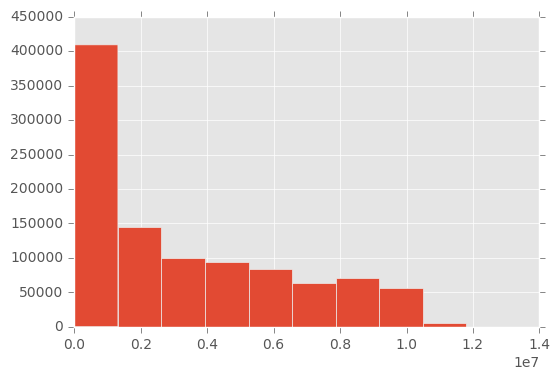

In [75]:
plt.hist(df_model['event_to_touchpoint'])

In [76]:
df_model['event_to_touchpoint']=df_model['event_to_touchpoint']+1

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
df_model['log_event_to_touchpoint']=np.log(df_model['event_to_touchpoint'])

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
df_model['day_of_week']=df_model.touchpoint_date.dt.weekday_name

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
df_model['month']=df_model.touchpoint_date.dt.month

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
df_model['week_of_month']=(df_model.touchpoint_date.dt.day-1)//7+1

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
df_model['>20_touchpoints']=np.where(df_model.touchpoints_in_path>20,
                                     1,0)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
df_model.drop('event_to_touchpoint',inplace=True,axis=1)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
target=df_model.conversion

In [85]:
#split data into train dataset and test dataset 80/20
df_train,df_test,target_train,target_test = train_test_split(df_model,target,test_size=0.2,random_state=1)

In [86]:
full_data=[df_train,df_test]

In [88]:
#Calculate conversion mean for selected categories 
for dataset in full_data:
    dataset['channel_con_mean']=dataset.source_1.map(dataset.groupby('source_1')['conversion'].mean())
    dataset['touchpoint_site_name_con_mean']=dataset.touchpoint_site_name.map(dataset.groupby('touchpoint_site_name')['conversion'].mean())
    dataset['event_site_name_con_mean']=dataset.event_site_name.map(dataset.groupby('event_site_name')['conversion'].mean())   
    dataset['channel_con_median']=dataset.source_1.map(dataset.groupby('source_1')['conversion'].median())
    dataset['path_position_con_mean']=dataset.path_position.map(dataset.groupby('path_position')['conversion'].mean())
    dataset['path_position_con_median']=dataset.path_position.map(dataset.groupby('path_position')['conversion'].median())

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822081 entries, 768728 to 153401
Data columns (total 25 columns):
event_site_name                  822081 non-null object
touchpoint_site_name             822081 non-null object
event_type                       822081 non-null object
conversion                       822081 non-null float64
touchpoint_type                  822081 non-null object
source_1                         822081 non-null object
source_2                         822081 non-null object
touchpoints_in_path              822081 non-null int64
attribution_sequence             822081 non-null int64
path_position                    822081 non-null object
event_date                       822081 non-null datetime64[ns]
touchpoint_date                  822081 non-null datetime64[ns]
first_touch_date                 822081 non-null datetime64[ns]
last_touch_date                  822081 non-null datetime64[ns]
log_event_to_touchpoint          822081 non-null float64
day_of_week 

In [90]:
df_train['train_test']='train'
df_test['train_test']='test'

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [91]:
df_combine=pd.concat([df_train,df_test],ignore_index=True)

## Get Dummies

In [92]:
df_combine_dummies=pd.get_dummies(df_combine,columns=['event_site_name','touchpoint_site_name','event_type','touchpoint_type','source_1','source_2','path_position','day_of_week','month','week_of_month'],
                          drop_first=True)

In [93]:
df_combine_dummies.head()

,conversion,touchpoints_in_path,attribution_sequence,event_date,touchpoint_date,first_touch_date,last_touch_date,log_event_to_touchpoint,>20_touchpoints,channel_con_mean,...,day_of_week_Wednesday,month_2,month_3,month_4,month_11,month_12,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
0,0.000002,15,9,2017-04-06 22:16:00,2017-04-03 16:42:39,2017-01-16 19:09:52,2017-04-06 22:16:00,12.539691,0,0.007424,...,0,0,0,1,0,0,0,0,0,0
1,0.000040,45,26,2017-04-21 16:08:26,2017-03-21 17:26:57,2016-12-14 19:15:51,2017-04-21 16:08:26,14.798970,1,0.007424,...,0,0,1,0,0,0,0,1,0,0
2,0.165877,6,3,2017-04-24 01:00:53,2017-04-19 22:29:37,2017-04-19 00:20:51,2017-04-22 11:05:44,12.778963,0,0.007424,...,1,0,0,1,0,0,0,1,0,0
3,0.000982,25,11,2017-04-04 15:42:00,2017-02-13 12:41:40,2017-01-24 12:44:33,2017-04-04 15:42:00,15.281268,1,0.012657,...,0,1,0,0,0,0,1,0,0,0
4,0.007667,13,6,2017-04-20 15:32:00,2017-04-03 13:28:09,2017-03-03 12:25:25,2017-04-20 15:32:00,14.205003,0,0.007424,...,0,0,0,1,0,0,0,0,0,0


In [94]:
#split df_combine_dummies into df_train_dummies and df_test_dummies
df_train_dummies=df_combine_dummies.loc[df_combine_dummies.train_test=='train',:]
df_test_dummies=df_combine_dummies.loc[df_combine_dummies.train_test=='test',:]

## Model Creation 

In [95]:
import os

In [96]:
#environment for xgboost
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


In [97]:
from xgboost import XGBRegressor

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import (Ridge,Lasso, TheilSenRegressor, RANSACRegressor, HuberRegressor)

from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor,
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn.neighbors import (KNeighborsRegressor)
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb

In [99]:
from sklearn import metrics
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.feature_selection import RFE

In [100]:
full_data_dummies=[df_train_dummies,df_test_dummies]

In [101]:
#drop column with date
for dataset in full_data_dummies:
    dataset.drop(date_col,axis=1,inplace=True)
    
    dataset.drop('train_test',axis=1,inplace=True)

    target = dataset.conversion
    dataset.drop('conversion',axis=1,inplace=True)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [102]:
df_train_dummies.shape,df_test_dummies.shape

((822081, 665), (205521, 665))

### Lasso, features_selection

In [48]:
lasso=Lasso(alpha=0.05,random_state=1)

In [53]:
#Recursive Feature Elimination
rfe=RFE(lasso,10)

In [54]:
rfe.fit(df_train_dummies,target_train)

RFE(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [68]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [71]:
df_train_dummies.columns[rfe.support_]

Index(['touchpoints_in_path', 'attribution_sequence',
       'log_event_to_touchpoint', 'month_4', 'month_11', 'month_12',
       'week_of_month_2', 'week_of_month_3', 'week_of_month_4',
       'week_of_month_5'],
      dtype='object')

In [80]:
predict_0=rfe.predict(df_test_dummies)

In [81]:
lasso.score(df_test_dummies,target_test)

0.33651266625065779

### Ridge (Out)

In [103]:

alg=Ridge(alpha=0.05,random_state=1)

alg.fit(df_train_dummies,target_train)

predict = alg.predict(df_test_dummies)

df_test.reset_index(drop=True, inplace=True)

pd.DataFrame([target_test.values,predict]).T.head()

alg.score(df_test_dummies,target_test)


0.56229359500054099

```
kf=KFold(len(df_combine_dummies),n_folds=10,
         shuffle=True,random_state=0)


print (cross_val_score(alg,df_dummies,target,
               cv=kf,scoring='neg_mean_squared_error').mean())
```

### Decision Tree (Out)

```
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(max_depth=40)

dt.fit(df_train,target_train)

predict2 = dt.predict(df_test)

metrics.mean_squared_error(target_test,predict2)

dt.score(df_test,target_test)
```

### Elastic Net (Out)

```
elastic=ElasticNet(alpha=0.5)

elastic.fit(df_train_dummies,target_train)

predict2 = elastic.predict(df_test_dummies)

metrics.mean_squared_error(target_test,predict2)

elastic.score(df_test_dummies,target_test)
```


### Random Forest 

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf=RandomForestRegressor(n_estimators=52,max_depth=None,n_jobs=-1,random_state=1)

In [106]:
rf.fit(df_train_dummies,target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=52, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [107]:
predict1=rf.predict(df_test_dummies)

In [108]:
metrics.mean_squared_error(target_test,predict1)

0.0077912762725722996

In [109]:
pd.DataFrame([target_test.values,predict1])

,0,1,2,3,4,5,6,7,8,9,...,205511,205512,205513,205514,205515,205516,205517,205518,205519,205520
0,0.005126,0.000001,0.000033,0.070821,0.000003,0.001060,0.000015,0.000017,0.006221,0.007965,...,0.000000,0.000000,0.001365,0.000007,0.000192,0.002683,0.000001,0.000001,0.004074,0.005921
1,0.003392,0.000022,0.000060,0.645051,0.002559,0.001945,0.005351,0.000152,0.001903,0.005369,...,0.000017,0.001791,0.002290,0.001700,0.000294,0.002686,0.000413,0.000987,0.003341,0.003353


* Get the best Random Forest

In [110]:
#n_trees=range(50,55)
#n_scores= []
#for n in n_trees:
#    rf=RandomForestRegressor(n_estimators=n,max_depth=10)
#    rf.fit(df_train,target_train)
#    score=metrics.mean_squared_error(target_test,rf.predict(df_test))
#    n_scores.append(score)

In [111]:
#plt.plot(n_trees,n_scores)
#plt.xlabel('Value of Trees for Random Forest')
#plt.ylabel('Random Forest Mean Squared Error')

In [112]:
#scores=cross_val_score(rf,df_dummies,target,cv=2,scoring='neg_mean_squared_error')

In [113]:
#scores

In [114]:
rf.score(df_test_dummies,target_test)

0.6824236625717508

### GBR

In [62]:
gbr=GradientBoostingRegressor(n_estimators=52,learning_rate=0.1,max_depth=5,subsample=0.8)

In [63]:
gbr.fit(df_train_dummies,target_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=52, presort='auto',
             random_state=None, subsample=0.8, verbose=0, warm_start=False)

In [64]:
predict3=gbr.predict(df_test_dummies)

In [65]:
metrics.mean_squared_error(target_test,predict3)

0.0091044161867200341

In [66]:
gbr.score(df_test_dummies,target_test)

0.62889941957526907

### XGBoost 

In [67]:
xgboost=XGBRegressor(n_estimators=200,
                     learning_rate=0.02,
                     max_depth=4,
                     min_child_weight=2,
                     gamma=0.9,
                     subsample=0.8,
                     colsample_bytree=0.8)

In [ ]:
xgboost.fit(df_train_dummies,target_train)

In [ ]:
predict4=xgboost.predict(df_test_dummies)

In [ ]:
metrics.mean_squared_error(target_test,predict4)

In [ ]:
xgboost.score(df_test_dummies,target_test)